In [1]:
import numpy as np
import itertools
import os

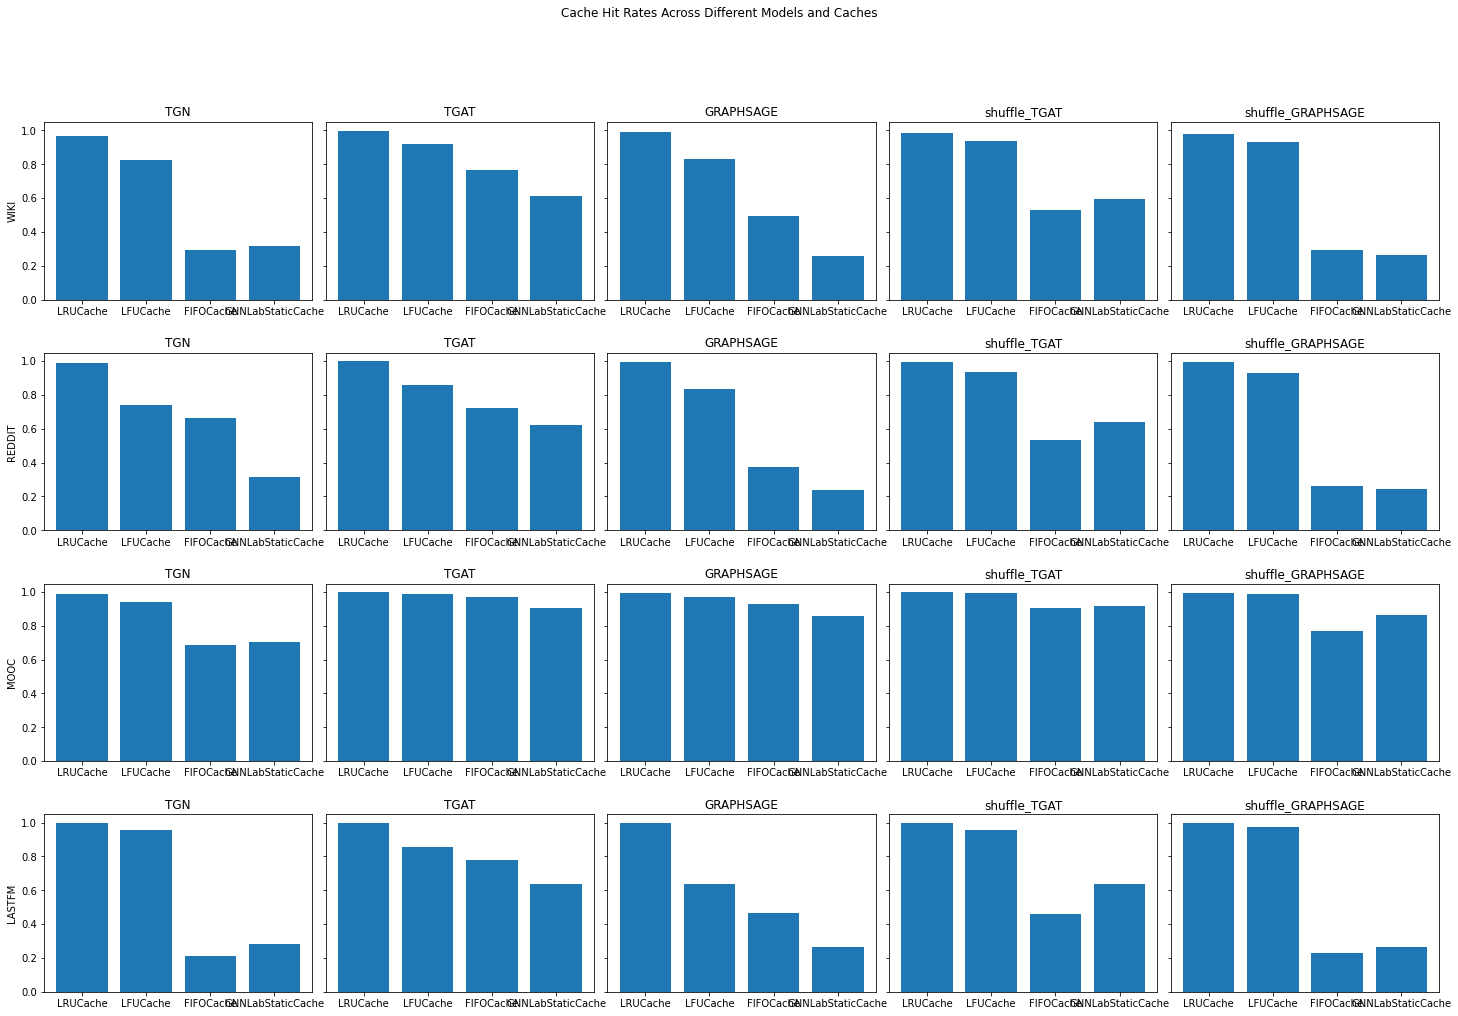

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

models = ['TGN', 'TGAT', 'GRAPHSAGE', 'shuffle_TGAT', 'shuffle_GRAPHSAGE', 'shuffle_TGN']
datasets = ['WIKI', 'REDDIT', 'MOOC', 'LASTFM']
cache = ['LRUCache', 'LFUCache', 'FIFOCache', 'GNNLabStaticCache']
param_space = itertools.product(models, datasets, cache)

subdir = 'edge_cache/'
prefix = "_{}_{}_{}.npy"

fig, axs = plt.subplots(len(datasets), len(
    models), figsize=(25, 16), sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.05)
fig.suptitle('Cache Hit Rates Across Different Models and Caches')

for i, data in enumerate(datasets):
    for j, model in enumerate(models):
        hit_rates = []
        for c in cache:
            hit_rate = np.load(subdir + "edge_cache_hit_rate" +
                               prefix.format(model, data, c)).mean()
            hit_rates.append(hit_rate)
        axs[i][j].bar(cache, hit_rates)
        axs[i][j].set_title(model)
        if j == 0:
            axs[i][j].set_ylabel(data)

plt.show()


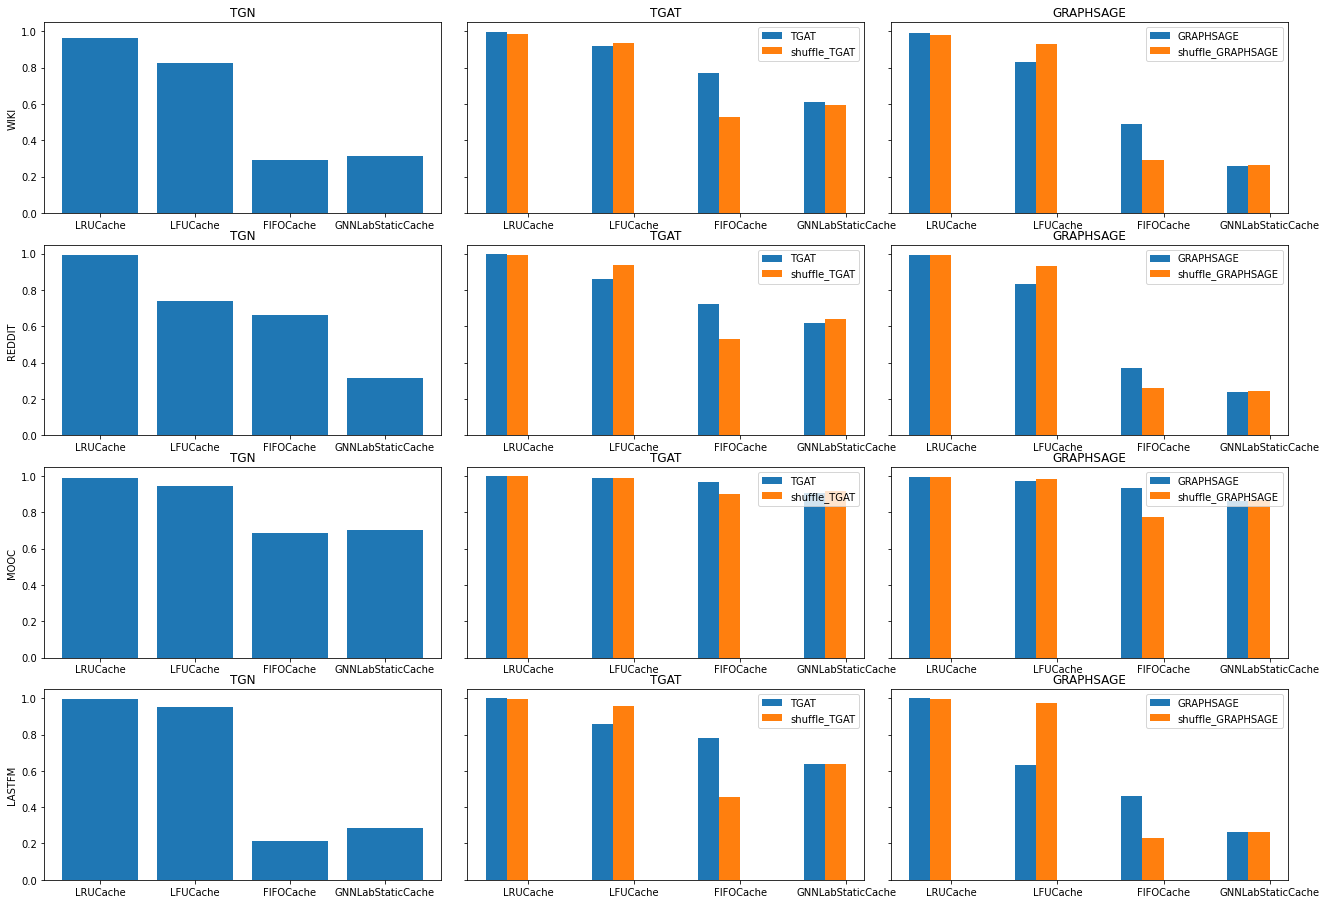

In [16]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

models = ['TGN', 'TGAT', 'GRAPHSAGE']
datasets = ['WIKI', 'REDDIT', 'MOOC', 'LASTFM']
cache = ['LRUCache', 'LFUCache', 'FIFOCache', 'GNNLabStaticCache']
param_space = itertools.product(models, datasets, cache)

subdir = 'edge_cache/'
prefix = "_{}_{}_{}.npy"

fig, axs = plt.subplots(len(datasets), 3,
                        figsize=(18, 12.5), sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.05)
fig.tight_layout()
# fig.suptitle('Cache Hit Rates Across Different Models and Caches')

for i, data in enumerate(datasets):
    for j, model in enumerate(models):
        if model == 'TGN':
            hit_rates = []
            for c in cache:
                hit_rate = np.load(
                    subdir + "edge_cache_hit_rate" + prefix.format(model, data, c)).mean()
                hit_rates.append(hit_rate)
            axs[i][j].bar(cache, hit_rates)
            axs[i][j].set_title(model)
            if j == 0:
                axs[i][j].set_ylabel(data)
        else:
            hit_rates_TGAT = []
            hit_rates_shuffle_TGAT = []
            hit_rates_GRAPHSAGE = []
            hit_rates_shuffle_GRAPHSAGE = []
            for c in cache:
                hit_rate = np.load(
                    subdir + "edge_cache_hit_rate" + prefix.format(model, data, c)).mean()
                shuffle_hit_rate = np.load(
                    subdir + "edge_cache_hit_rate" + prefix.format('shuffle_' + model, data, c)).mean()
                hit_rates_TGAT.append(hit_rate)
                hit_rates_shuffle_TGAT.append(shuffle_hit_rate)

            bar_width = 0.2
            axs[i][j].bar([x - 1.5 * bar_width for x in range(len(cache))],
                            hit_rates_TGAT, width=bar_width, label=model)
            axs[i][j].bar([x - 0.5 * bar_width for x in range(len(cache))],
                            hit_rates_shuffle_TGAT, width=bar_width, label='shuffle_'+model)
            axs[i][j].set_xticks(range(len(cache)))
            axs[i][j].set_xticklabels(cache)
            axs[i][j].set_title(model)
            axs[i][j].legend()

plt.show()
